# Analyzing CIA Factbook Data Using SQL

## Introduction


The **World Factbook**, also known as the **CIA World Factbook**, is a reference **resource** produced by the **Central Intelligence Agency (CIA)** with almanac-style information about the countries of the **world**. It is frequently used as a resource for academic research papers and news articles.

The World Factbook provides basic intelligence on the history, people, government, economy, energy, geography, environment, communications, transportation, military, terrorism, and transnational issues for 266 world entities.

A wide variety of folks including US Government officials, researchers, news organizations, corporations, geographers, travelers, teachers, professors, librarians, and students access this resource. In short, anyone looking for an expansive body of international data on a recently updated Web site. The World Factbook is visited by tens of millions of visitors annually and is especially popular during the school year, with a noticeable drop-off in online visits during the summer months. In all, The World Factbook is one of the US Government’s most popular Web sites.

**<span style="color:blue">In this project</span>**, we'll work with data from the CIA World Factbook found [here](https://www.cia.gov/the-world-factbook/ "here"), a compendium of statistics about all of the countries on Earth.

**I did plenty of extra research over and above what is called for in this Guided Project and came across very interesting information. <span style="color:blue">For example, you will find out what island is know as <span style="color:red">"Mutiny on The Bounty"</span> Island and hear some interesting things about it via Youtube Video.</span>**

In [1]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

In [2]:
%%sql
-- NOTE: display all information of tables in factbook database.
    
SELECT *
  FROM sqlite_master
 WHERE type='table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


## Table Description

Here are descriptions for some of the columns:

* **<span style="color:red">name</span>** — the name of the country.
* **<span style="color:red">area</span>** — the country's total area (both land and water).
* **<span style="color:red">area_land</span>** — the country's land area in square kilometers.
* **<span style="color:red">area_water</span>** — the country's water area in square kilometers.
* **<span style="color:red">population</span>** — the country's population.
* **<span style="color:red">population_growth</span>** — the country's population growth as a percentage.
* **<span style="color:red">birth_rate</span>** — the country's birth rate, or the number of births per year per 1,000 people.
* **<span style="color:red">death_rate</span>** — the country's death rate, or the number of death per year per 1,000 people.

In [3]:
%%sql
-- NOTE: observe the first five rows of the table content.
    
SELECT *
 FROM facts
LIMIT 5;    

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## <span style="color:blue">Questions</span>

#### 1. What is the minimum population of a country in the world?
#### 2. What is the maximum population of a country in the world?
#### 3. What is the minimum population growth of a country in the world?
#### 4. What is the maximum population growth of a country in the world?

In [4]:
%%sql
-- NOTE: Check out reasonableness on Min and Max values for population and population growth.
    
SELECT MIN(population) AS Minimum_Population,
       MAX(population) AS Maximum_Population,
       MIN(population_growth) AS Minimum_Pop_Growth,
       MAX(population_growth) AS Maximum_Pop_Growth
  FROM facts;

 * sqlite:///factbook.db
Done.


Minimum_Population,Maximum_Population,Minimum_Pop_Growth,Maximum_Pop_Growth
0,7256490011,0.0,4.02


## <span style="color:red">Crazy Numbers!</span>

Neither the minimum (0) nor maximum (7,256,490,011) populations look reasonable for any specific country. The maximum value is actually the total world population.

In order to answer the questions posed further above, we need to do some data cleaning. Yes!! The joy of data analysis!!

# Population

In [5]:
%%sql
-- NOTE: reveal the top 25 rows of poulation with lowest values
-- to determine how many countries show 0 population.

SELECT name AS Country, population AS Population
  FROM facts
ORDER BY population
LIMIT 25;


 * sqlite:///factbook.db
Done.


Country,Population
Ashmore and Cartier Islands,None
Coral Sea Islands,None
Heard Island and McDonald Islands,None
Clipperton Island,None
French Southern and Antarctic Lands,None
Bouvet Island,None
Jan Mayen,None
British Indian Ocean Territory,None
South Georgia and South Sandwich Islands,None
Navassa Island,None


## <span style="color:green">Observations</span>

We see there is only one country with 0 population; Antactica.

**Antarctica** is known for being the highest, driest, coldest and windiest continent on earth. ... Although there are no native Antarcticans and no permanent residents or citizens of Antarctica, many people do live in Antarctica each year. So, since there are no permanent residents, then **on that basis the populaiton is deemed to be 0.**

There are 19 countries that have 'None" assigned to population.

In [6]:
%%sql
-- NOTE: reveal the top 10 rows of poulation with highest values
-- to determine if there are any other unreasonable high population values.

SELECT name AS Country, population AS Population
  FROM facts
ORDER BY population DESC
LIMIT 5;

 * sqlite:///factbook.db
Done.


Country,Population
World,7256490011
China,1367485388
India,1251695584
European Union,513949445
United States,321368864


## <span style="color:green">Observation</span>

It looks like there is only one large population value that is unreasonable for a country population; "World".

In [7]:
%%sql
-- NOTE: remove unreasonable population values to determine correct minimum abd maximum values.

SELECT MIN(population) AS Minimum_Population,
       MAX(population) AS Maximum_Population,
       MIN(population_growth) AS Minimum_Pop_Growth,
       MAX(population_growth) AS Maximum_Pop_Growth
  FROM facts
WHERE (population > 0) AND (population < 7000000000) AND (population != 'None');


 * sqlite:///factbook.db
Done.


Minimum_Population,Maximum_Population,Minimum_Pop_Growth,Maximum_Pop_Growth
48,1367485388,0.0,4.02


## <span style="color:green">Observations - Population</span>

We now have a number greater than 0 for minimum (48) and a number less than the world population for maximum (1,367,485,388).

Let's find out what countries those belong to.

In [8]:
%%sql
-- NOTE: request minimum and maximum values by calling out exact values with WHERE code.


SELECT name AS Country, population AS Population
  FROM facts
 WHERE (population = 48) OR (population = 1367485388);   

 * sqlite:///factbook.db
Done.


Country,Population
China,1367485388
Pitcairn Islands,48


## <span style="color:green">Observations - Population</span>

I think most everyone knows that **China** has the largest population.

First settled by mutineers in 1790, with a population of **48**, **Pitcairn** is a British Overseas Territory (map below) and is considered the **world's smallest country** by population and is only slightly larger than Monaco.

The Pitcairn Islands group is a British Overseas Territory. It comprises the islands of Pitcairn, Henderson, Ducie and Oeno. Pitcairn, the only inhabited island, is a small volcanic outcrop situated in the South Pacific at latitude 25.04 south and longitude 130.06 west. It is roughly 2170km (1350 miles) east south-east of Tahiti and just over 6600km (4100 miles) from Panama. The Islands' administrative headquarters are situated in Auckland New Zealand, 5310km (3300 miles) away. **MORE INTERESTING INFORMATION ON PITCAIRN TO COME!!**


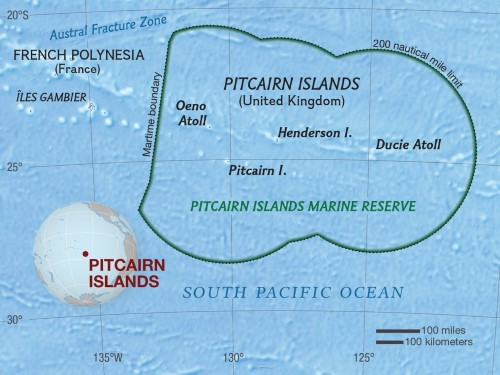

# Population Growth

Population growth output shown further above revealed maximum as 4.02 and minimum as 0.0. The units for these values is percent. The value 4.02 as a percent doesn't seem unreasonable as a maximum. It's possible that the minimum value of 0.0 could be authentic.

Let's find out what countries have these values.

In [9]:
%%sql
-- NOTE: identify the countries with lowest and highest population growth values.

SELECT name AS Country, population_growth AS Population_Growth, death_rate AS Death_Rate, birth_rate AS Birth_Rate
  FROM facts
 WHERE (population_growth = 0.0) OR (population_growth = 4.02);   

 * sqlite:///factbook.db
Done.


Country,Population_Growth,Death_Rate,Birth_Rate
South Sudan,4.02,8.18,36.91
Holy See (Vatican City),0.0,None,None
Cocos (Keeling) Islands,0.0,None,None
Greenland,0.0,8.49,14.48
Pitcairn Islands,0.0,None,None


## <span style="color:green">Observations - Population Growth</span>

**Maximum population growth:**  **South Sudan** is shown to be the one with maximum population growth. Looking at the ratio of birth rate to death rate (36.91/8.18 = 4.51) certainly contributes to the high population growth. the calculated value of 4.02 is valid for a specific year around 2009 and 2010 according to the South Sudan annual growth rate **<span style="color:blue">graph below</span>**. The graph shows growth rate fluctuation to be very high year to year. The most recent growth rate shown for 2019 is only 0.78.

**Minimum population growth:** There are four "countries" shown above for which population growth rate is reported as 0. **<span style="color:RED">Are these correct?</span>** Let's find out with further research.

First, let's see the definition of population growth rate that the "CIA World Factbook" bases their growth rate calulations on.

**Population Growth Definition:** The average annual percent change in the population, resulting from a surplus (or deficit) of births over deaths and the balance of migrants entering and leaving a country. The rate may be positive or negative. The growth rate is a factor in determining how great a burden would be imposed on a country by the changing needs of its people for infrastructure (e.g., schools, hospitals, housing, roads), resources (e.g., food, water, electricity), and jobs. Rapid population growth can be seen as threatening by neighboring countries.

**Vatican City**: Here is a statment I found that seems to justify 0 population growth to be reported by "CIA World Factbook", _"Vatican City is the only state in the world with a zero birth rate. This is explained by the fact that there are no maternity hospitals within the territory of this small state. The babies of this enclave's citizens are born in Roman hospitals."_ 

**Cocos (Keeling) Island** The Cocos Island growth rate **<span style="color:red">graph below</span>**, indicates growth reate was 0 from 2003 to 2014. From what I've read, that seems to have remained at 0 with little or no information on reasons why no change.

**Greenland** Looking at the Greenland population growth rate **<span style="color:green">graph further below</span>**, we see that population growth has been hovering around zero from 1993 to present. In fact population growth rate is projected to consistently be negative in the future. Information from an article titled, "AWI Comments on Greenland’s
Methods for Calculating Aboriginal Subsistence Need" states the following:

- Greenland’s population is declining. Greenland’s methodology does not acknowledge that most of the population increase in Greenland from 1985 to 2012 occurred in the 1980s and 1990s but has slowed since then and that its population is now
contracting based on Greenland’s own statistical data. A recent government publication, “Greenland in Figures, 2014,” shows that the 2014 population (56,282) is lower than in 2002 (56,545) and is expected to decrease further. The front page of the self-rule government’s Statistics Greenland website dated May 15, 2014 announces that the total population “is over the next 20 years projected to decline from todays 56,282 persons to 55,900 in 2020 and 54,800 in 2030”. The projected decline can partly be attributed to a fall in the total fertility rate to 2.0 children per woman in Greenland (below the replacement level for population stability of 2.1 children). In addition, emigration consistently exceeds immigration.


**Pitcairn** is well known as the **"Mutiny on the Bounty"** Island. [Here](https://www.youtube.com/watch?v=eJ-Q4D5aXPk "Here") is a very interesting discussion on Youtube titled **"Pitcairn Islands Face Extinction"**, that's validates the reason why Pitcairn population growth is currently declared to be 0.

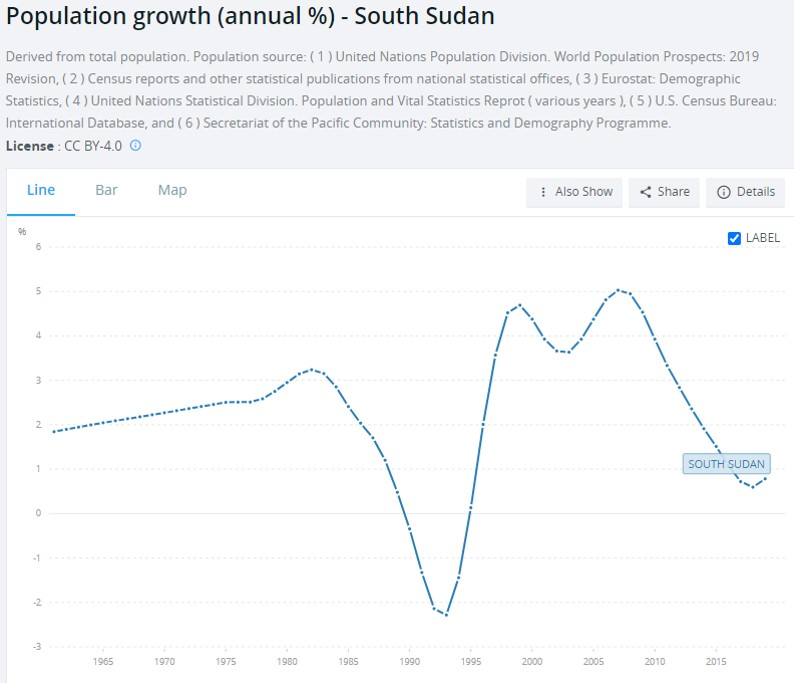

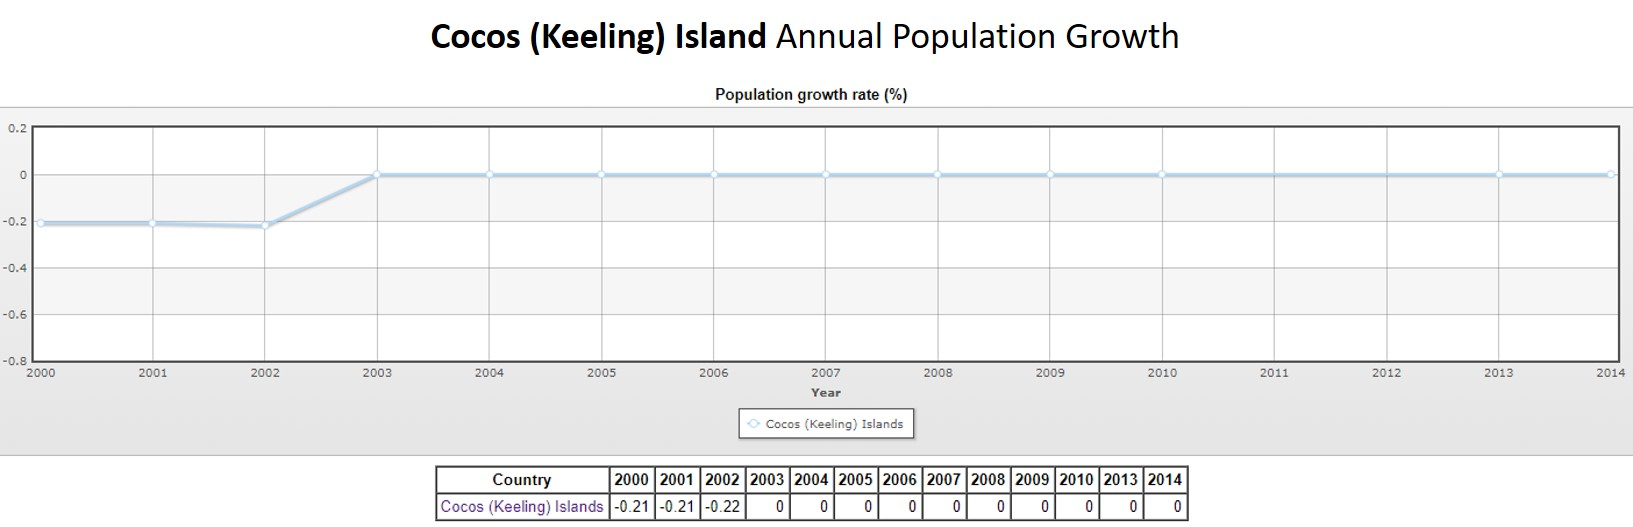

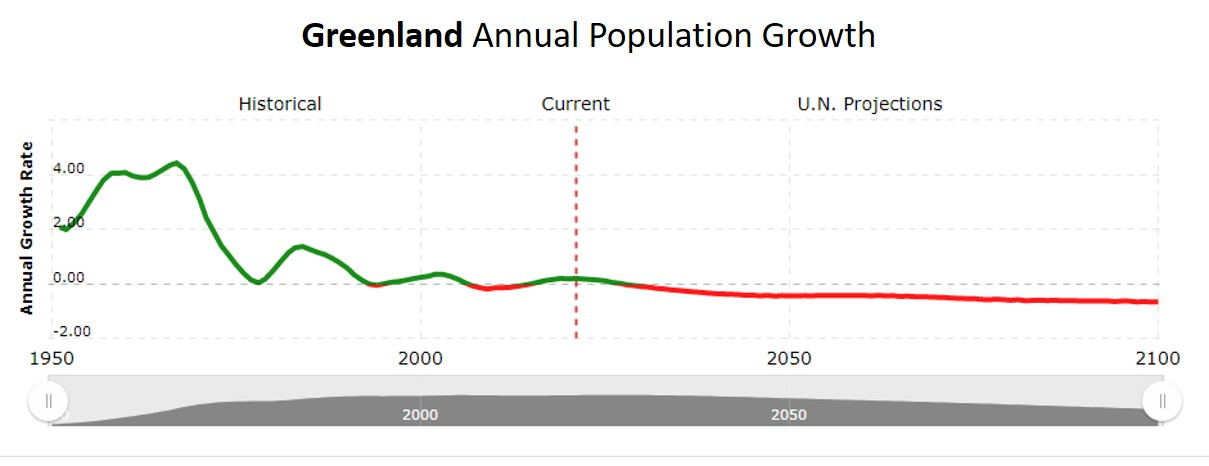

## <span style="color:blue">Question - Most Densely Populated Countries</span>

#### What countries have population above average AND total land area below average?

### NOTE:

We have already identified unrealistic populations and will exclude those from calculating average population.

We need to determine if there are any unrealistic country "area" values in the dataset that must be excluded from average country area calculations.

In [10]:
%%sql
SELECT name AS Country, MAX(area) AS Maximum_Land_area
  FROM facts;

 * sqlite:///factbook.db
Done.


Country,Maximum_Land_area
Russia,17098242


## Cross Check

I confirmed the land area shown above for Russia is accurate and not unreasonable.

In [11]:
%%sql
-- NOTE: check values of lowest land area for reasonableness.

SELECT name AS Country, area as Land_Area
  FROM facts
ORDER BY area
LIMIT 14;

 * sqlite:///factbook.db
Done.


Country,Land_Area
Chad,None
Niger,None
French Southern and Antarctic Lands,None
Saint Barthelemy,None
United States Pacific Island Wildlife Refuges,None
Antarctica,None
Arctic Ocean,None
Atlantic Ocean,None
Indian Ocean,None
Pacific Ocean,None


## <span style="color:green">Observations</span>

Vatican City land area is shown as 0 and that may be because it is less that 1 sq. km. In fact, it is actually 0.49 sq. km. and is shown in the table below as 0 since it was rounded down as an integer. However, I think we should exclude that from the calculations of averages, because I consider Vatican City land area as a significant "outlier" that would distort the calculated averages.

There are 12 other "countries" showing 'None' for area.

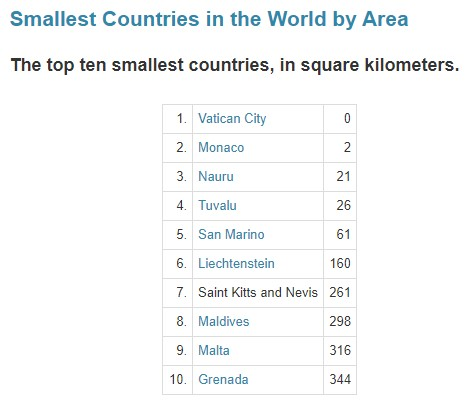

In [12]:
%%sql
-- NOTE: exclude appropriate values in order to generate correct averages.

SELECT CAST(AVG(population) AS INT) AS Average_Population, CAST(AVG(area) AS INT) AS Average_Land_Area
  FROM facts
 WHERE (population < 7000000000) AND (population > 0) AND(area > 0);    

 * sqlite:///factbook.db
Done.


Average_Population,Average_Land_Area
32799988,585419


In [13]:
%%sql
-- NOTE: specify both population and area in WHERE clause to generate apporpriate results.

SELECT name as Country, population as Population, area AS Land_Area, population / area AS People_Per_Sq_Km
  FROM facts
 WHERE population > (SELECT AVG(population)
                       FROM facts WHERE (population < 7000000000) AND (population > 0))
   AND area < (SELECT AVG(area) FROM facts)
ORDER BY People_Per_Sq_Km DESC;


 * sqlite:///factbook.db
Done.


Country,Population,Land_Area,People_Per_Sq_Km
Bangladesh,168957745,148460,1138
"Korea, South",49115196,99720,492
Philippines,100998376,300000,336
Japan,126919659,377915,335
Vietnam,94348835,331210,284
United Kingdom,64088222,243610,263
Germany,80854408,357022,226
Italy,61855120,301340,205
Uganda,37101745,241038,153
Thailand,67976405,513120,132


## <span style="color:green">Observations</span>

**Bangladesh** shows to have the highest density of people per square kilometre at 1138. That is **more than twice** the next highest densely populated country: South Korea at 492.

[HERE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2740702/ "Here") is an interesting article on Bangladesh, titled, "Population Challenges for Bangladesh in the Coming Decades".

## Dive Further: Into The Most Densely Populated "Countries"

Let's check country population density **without the restriction** of population being above average and land area being below average.

**<span style="color:blue">We might find some very interesting information.</span>**

In [14]:
%%sql
SELECT name AS Country, area AS Land_Area, population AS Population, population/area AS People_Per_SQ_Km
  FROM facts
 WHERE (area != 'None') AND (population != 'None') AND (population < 7000000000)
ORDER BY People_Per_Sq_Km DESC
LIMIT 12

 * sqlite:///factbook.db
Done.


Country,Land_Area,Population,People_Per_SQ_Km
Macau,28,592731,21168
Monaco,2,30535,15267
Singapore,697,5674472,8141
Hong Kong,1108,7141106,6445
Gaza Strip,360,1869055,5191
Gibraltar,6,29258,4876
Bahrain,760,1346613,1771
Maldives,298,393253,1319
Malta,316,413965,1310
Bermuda,54,70196,1299


## <span style="color:green">Observations</span>

Some of the "countries" listed above are categorized as such either based on the title "sovereign city-state" (e.g. Monoco) or some other reason. For example, Macau is a city in socio-demographic terms, and a Special Administrative Region of the People's Republic of China in governmental terms. Macau is not a country, it is a special administrative region under the Chinese one-country-two-system. It was a Portuguese colony granted by the Chinese for centuries before it reverted back to China in 1999.

**Macau** is shown to be the most density populated "country" in the world at **21,168** people per square kilometre. **This is almsot 19 times that of Bangladesh.** It has been deemed to be a "country" by the CIA World Factbook Org. and therefore was included in this dataset.

If we were able to list the most densely populated cities in the world, Macau would be well down on the list. The city that has the highest population density in the world is **Manila** in the Philippines, which was found to have a population per square km. of **46,178!!** This is more than twice that of Macau.

## <span style="color:blue">Question</span>

#### Which countries have a higher death rate than birth rate?

In [15]:
%%sql
SELECT name AS Country, death_rate as Death_Rate, birth_rate AS Birth_Rate, ROUND(death_rate / birth_rate, 3) AS Death_to_Birth_Ratio
  FROM facts
 WHERE Death_to_Birth_Ratio > 1.0
ORDER BY Death_to_Birth_Ratio DESC;

 * sqlite:///factbook.db
Done.


Country,Death_Rate,Birth_Rate,Death_to_Birth_Ratio
Bulgaria,14.44,8.92,1.619
Serbia,13.66,9.08,1.504
Latvia,14.31,10.0,1.431
Lithuania,14.27,10.1,1.413
Hungary,12.73,9.16,1.39
Monaco,9.24,6.65,1.389
Slovenia,11.37,8.42,1.35
Ukraine,14.46,10.72,1.349
Germany,11.42,8.47,1.348
Saint Pierre and Miquelon,9.72,7.42,1.31


## <span style="color:green">Observations</span>

**<span style="color:blue">Very, very interesting!</span>** Of the 24 countries listed above, only two "countries" are NOT part of Europe: "Saint Pierre and Miquelon" and Japan. **Wow!**

So why are 92% of the above listed countries with higher death rates than birth rates in Europe. I found an interesting article called, **"Deaths Exceed Births in Most of Europe"** that provides some explanation. It's available [here](https://scholars.unh.edu/cgi/viewcontent.cgi?article=1261&context=carsey "here") as a _pdf_ file.

When I checked whether Saint Pierre and Miquelon are part of Europe, I was surpised to find out it was just south of Newfoundland and **is NOT part of Canada!** Saint-Pierre and Miquelon (a group of islands) are the last piece of French territory in North America. They are quite distinct from Newfoundland and Labrador.

## <span style="color:blue">Question</span>

#### Which countries have the highest birth rate?

In [16]:
%%sql
SELECT name AS Country, birth_rate AS Birth_Rate, death_rate AS Death_Rate, population AS Population
  FROM facts
ORDER BY birth_rate DESC
Limit 20;

 * sqlite:///factbook.db
Done.


Country,Birth_Rate,Death_Rate,Population
Niger,45.45,12.42,18045729
Mali,44.99,12.89,16955536
Uganda,43.79,10.69,37101745
Zambia,42.13,12.67,15066266
Burkina Faso,42.03,11.72,18931686
Burundi,42.01,9.27,10742276
Malawi,41.56,8.41,17964697
Somalia,40.45,13.62,10616380
Angola,38.78,11.49,19625353
Mozambique,38.58,12.1,25303113


## <span style="color:green">Observations</span>

#### **WOW!**

Only 1 out of the top 20 countries with highest birth_rate is **NOT** from Africa! That is Afghanistan.

All the rest are countries of Africa. I came across some reasons given in the article I read. You can find it [here](https://www.populationconnection.org/africa-globaldev/ "here")

A key reason given is, high fertility driven by multiple factors:

- high desired family size
- low levels of use of modern contraceptives
- high levels of adolescent child bearing

The graph below taken from the article I read, shows fertility rate of Africa compared to other regions of the world.

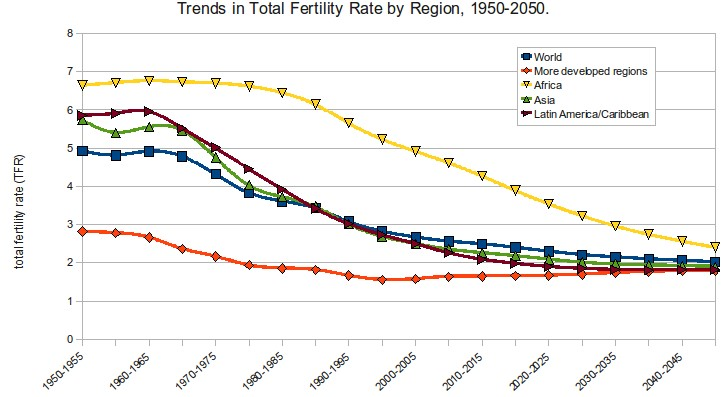

## <span style="color:blue">Final Questions</span>

#### 1. Which countries have more water than land?
#### 2. Which countries have the highest ratios under 1.0 of water to land?

In [17]:
%%sql
SELECT name AS Country, area_land AS Land_Area, area_water AS Water_Area, ROUND(CAST(area_water AS Float)/CAST(area_land AS Float), 4) AS Ratio_of_Water_to_Land
  FROM facts
 WHERE (area_water != 'None') AND (area_water != 0) AND (area_land != 'None') AND (area_land != 0)
ORDER BY Ratio_of_Water_to_Land DESC
 Limit 20;


 * sqlite:///factbook.db
Done.


Country,Land_Area,Water_Area,Ratio_of_Water_to_Land
British Indian Ocean Territory,60,54340,905.6667
Virgin Islands,346,1564,4.5202
Puerto Rico,8870,4921,0.5548
"Bahamas, The",10010,3870,0.3866
Guinea-Bissau,28120,8005,0.2847
Malawi,94080,24404,0.2594
Netherlands,33893,7650,0.2257
Uganda,197100,43938,0.2229
Eritrea,101000,16600,0.1644
Liberia,96320,15049,0.1562


## <span style="color:green">Observations</span>

There are only two "countries" shown in the table above identified as having greater water area than land area: **The British Indian Ocean Territory** and the **Virgin Islands**. Personnally, I would say that is not correct in that I believe the water area is calculated based on all the water between the islands for each of these two "countries". Both the British Indian Ocean Territory and Virgin Islands are a group of many islands as shown in the two maps below. The islands do not fully enclose all the water in between to create a "lake" or series of "lakes". **<span style="color:red">On that basis then, I would say these do not qualify as cases where the ratio of water area to land area is greater than one.</span>**


**The British Indian Ocean Territory** (BIOT) shown in map below, enjoys a highly strategic location in the centre of the Indian Ocean, about 1,770 kilometres east of the Seychelles and 2,180km north-east of Port Louis, Mauritius. The territory, an archipelago of 58 islands also known as the Chagos Archipelago, covers some 640,000km2 of ocean. The islands have a total land area of only 60km2. Diego Garcia, the largest and most southerly island, has an area of 44 square km. In 1971, Diego Garcia was closed when the island was deemed necessary for defence purposes under the 1966 UK-US Exchange of Notes. Diego Garcia is home to approximately 3,000 UK and US military personnel and civilian contractors.

**Virgin Islands** - Of the 36 British islands, 16 are inhabited. Tortola (Turtle Dove), with an area of 21 square miles, is the largest and is the site of the group’s capital and population centre, Road Town. Other larger islands in the British group are Anegada, with an area of 15 square miles; Virgin Gorda (the Fat Virgin), with an area of 8 square miles; and Jost Van Dyke, about 3 square miles. Lesser islands include Great Tobago, Salt, Peter, Cooper, Norman, Guana, Beef, Great Thatch, Little Thatch, and Marina Cay.

**Puerto Rico** - Even though the ratio of water area to land area for Puerto Rico is less than 1 (0.5548), I believe that value is also not legitimate for the same reason as the two cases above (see map of Puerto Rico further below). I read the following about Puerto Rico: _"Although, often referred an island, Puerto Rico is an archipelago formed by the main island and 143 small islands, islets and cays, including Vieques, Culebra, Culebrita, Palomino, Mona, and Monito. Vieques and Culebra are also known by some by the Spanish Virgin Islands, formerly called the Passage Islands and also known as the Puerto Rican Virgin Islands."_

I would say the ratio values shown above for **The Bahamas** and **Guinea-Bassau** are also inaccurate for the same reason because of the inclusion of many islands.

It looks like the country with the highest legitimate water area to land area ratio is **Malawi (0.2847)**. We would say that about 25% of Malawi is covered with water. The map further below makes that value look reasonable. Malawi, a landlocked country in southeastern Africa, is defined by its topography of highlands split by the Great Rift Valley and enormous Lake Malawi. The lake’s southern end falls within Lake Malawi National Park – sheltering diverse wildlife from colorful fish to baboons – and its clear waters are popular for diving and boating. Peninsular Cape Maclear is known for its beach resorts.

In conclusion, I would say that no country has more than 30% of its land covered with water.

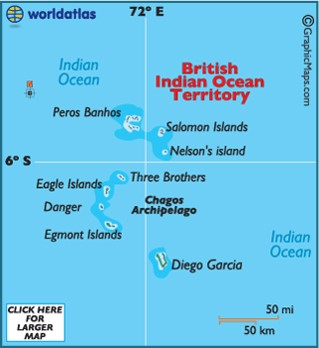

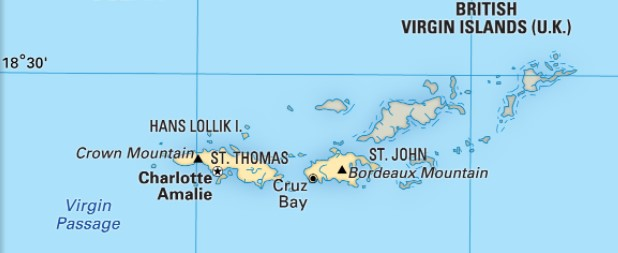

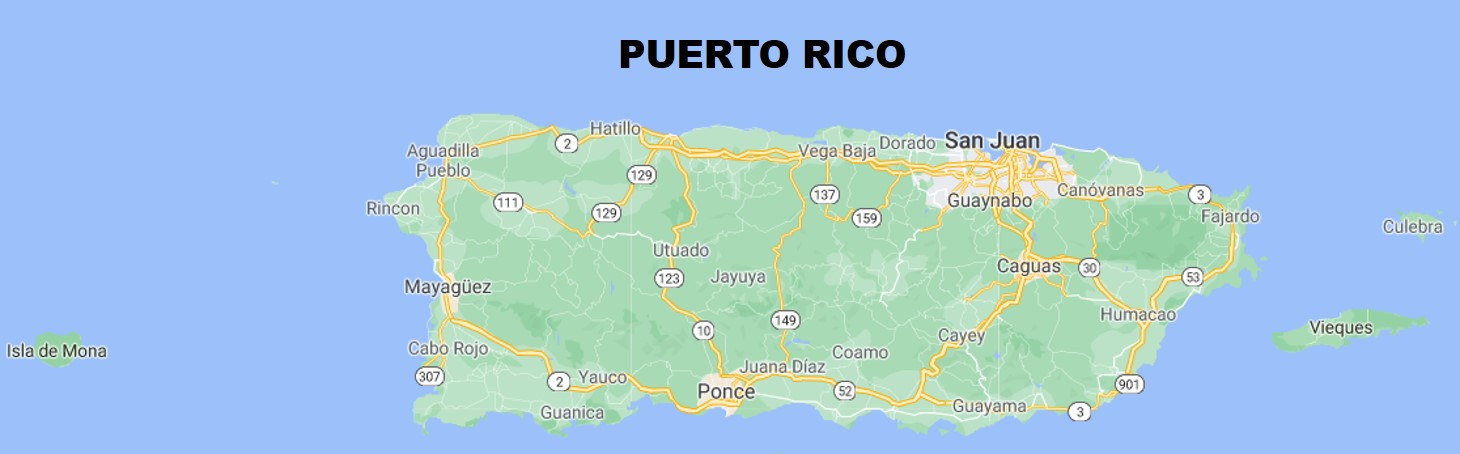

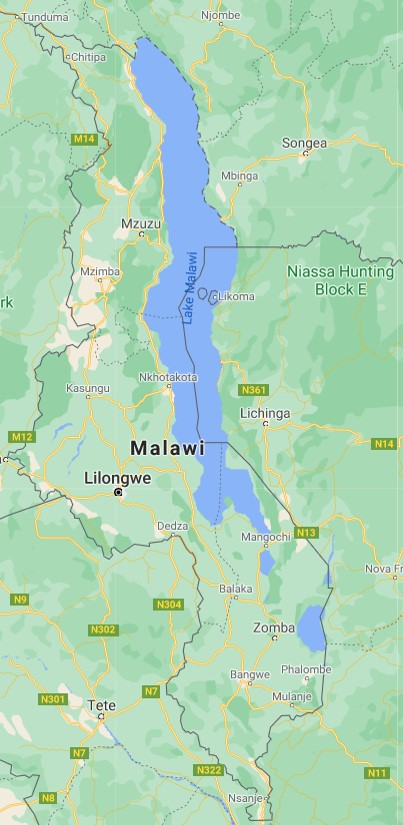

## Summary

I don't think I need to rehash all the observations described above.

It has been a great journey around the world discovering many things I didn't know about various countries! It sort of tweaked my interest in doing some travelling, when the time is right.

I suppose the most interesting thing I learned was about the Pitcairn Islands and Pitcairn itself being known as "Mutiny on the Bounty" Island and its history surrounding that!

**<span style="color:blue">I hope you enjoyed this very informative journey with me. Perhaps my next world project will be titled,</span> <span style="color:red">"Around the World in 80 Ways".</span>**